# 5 Graph Algorithms

## Connected Components

In [1]:
# List of edges along with distance as weights
edgelist = [['Mannheim', 'Frankfurt', 85], ['Mannheim', 'Karlsruhe', 80], ['Erfurt', 'Wurzburg', 186], 
            ['Munchen', 'Numberg', 167], ['Munchen', 'Augsburg', 84], ['Munchen', 'Kassel', 502], 
            ['Numberg', 'Stuttgart', 183], ['Numberg', 'Wurzburg', 103], ['Numberg', 'Munchen', 167], 
            ['Stuttgart', 'Numberg', 183], ['Augsburg', 'Munchen', 84], ['Augsburg', 'Karlsruhe', 250], 
            ['Kassel', 'Munchen', 502], ['Kassel', 'Frankfurt', 173], ['Frankfurt', 'Mannheim', 85], 
            ['Frankfurt', 'Wurzburg', 217], ['Frankfurt', 'Kassel', 173], ['Wurzburg', 'Numberg', 103], 
            ['Wurzburg', 'Erfurt', 186], ['Wurzburg', 'Frankfurt', 217], ['Karlsruhe', 'Mannheim', 80], 
            ['Karlsruhe', 'Augsburg', 250],["Mumbai", "Delhi",400],["Delhi", "Kolkata",500],
            ["Kolkata", "Bangalore",600],["TX", "NY",1200],["ALB", "NY",800]]

In [2]:
import networkx as nx

In [3]:
g = nx.Graph()
for edge in edgelist:
    g.add_edge(edge[0],edge[1], weight = edge[2])

Now, we need to find out distinct continents and their cities form this graph

In [4]:
for i, x in enumerate(nx.connected_components(g)):
    print('cc'+str(i)+':',x)

cc0: {'Augsburg', 'Kassel', 'Munchen', 'Stuttgart', 'Mannheim', 'Wurzburg', 'Erfurt', 'Karlsruhe', 'Numberg', 'Frankfurt'}
cc1: {'Bangalore', 'Kolkata', 'Delhi', 'Mumbai'}
cc2: {'NY', 'TX', 'ALB'}


## Shortest Path

In [5]:
print(nx.shortest_path(g, 'Stuttgart','Frankfurt', weight='weight'))
print(nx.shortest_path_length(g, 'Stuttgart','Frankfurt', weight='weight'))

['Stuttgart', 'Numberg', 'Wurzburg', 'Frankfurt']
503


In [6]:
# Shortest path between all pairs
for x in nx.all_pairs_dijkstra_path(g, weight='weight'):
    print(x)

('Mannheim', {'Mannheim': ['Mannheim'], 'Frankfurt': ['Mannheim', 'Frankfurt'], 'Karlsruhe': ['Mannheim', 'Karlsruhe'], 'Augsburg': ['Mannheim', 'Karlsruhe', 'Augsburg'], 'Kassel': ['Mannheim', 'Frankfurt', 'Kassel'], 'Wurzburg': ['Mannheim', 'Frankfurt', 'Wurzburg'], 'Munchen': ['Mannheim', 'Karlsruhe', 'Augsburg', 'Munchen'], 'Erfurt': ['Mannheim', 'Frankfurt', 'Wurzburg', 'Erfurt'], 'Numberg': ['Mannheim', 'Frankfurt', 'Wurzburg', 'Numberg'], 'Stuttgart': ['Mannheim', 'Frankfurt', 'Wurzburg', 'Numberg', 'Stuttgart']})
('Frankfurt', {'Frankfurt': ['Frankfurt'], 'Mannheim': ['Frankfurt', 'Mannheim'], 'Kassel': ['Frankfurt', 'Kassel'], 'Wurzburg': ['Frankfurt', 'Wurzburg'], 'Karlsruhe': ['Frankfurt', 'Mannheim', 'Karlsruhe'], 'Augsburg': ['Frankfurt', 'Mannheim', 'Karlsruhe', 'Augsburg'], 'Munchen': ['Frankfurt', 'Wurzburg', 'Numberg', 'Munchen'], 'Erfurt': ['Frankfurt', 'Wurzburg', 'Erfurt'], 'Numberg': ['Frankfurt', 'Wurzburg', 'Numberg'], 'Stuttgart': ['Frankfurt', 'Wurzburg', 'Numb

## Minimum Spanning Tree

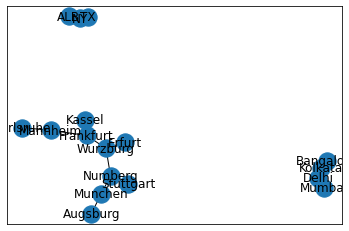

In [7]:
nx.draw_networkx(nx.minimum_spanning_tree(g))

In [8]:
nx.minimum_spanning_tree(g)

## Page rank

In [9]:
import numpy as np 
import pandas as pd 

# for basic visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
fb = nx.read_edgelist('facebook-combined.txt', create_using=nx.Graph(), nodetype=int)

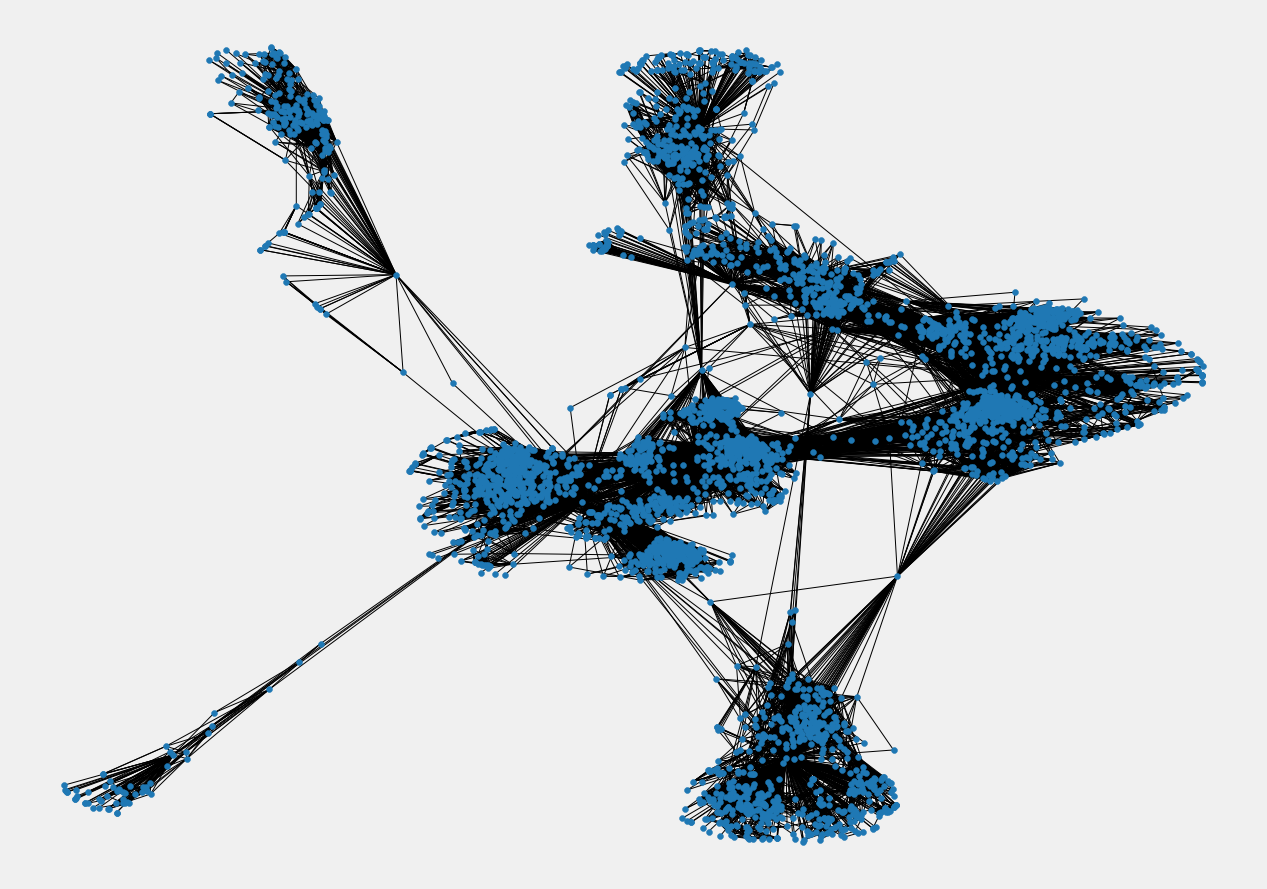

In [11]:
pos = nx.spring_layout(fb)
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')
nx.draw_networkx(fb, pos, with_labels = False, node_size = 35)
plt.show()

In [12]:
pageranks = nx.pagerank(fb)

In [13]:
# sorted pagerank -> most influential users
import operator
sorted_pagerank = sorted(pageranks.items(), key=operator.itemgetter(1), reverse = True)
print(sorted_pagerank[:5])

[(3437, 0.007614586844749603), (107, 0.006936420955866114), (1684, 0.0063671621383068295), (0, 0.006289602618466542), (1912, 0.0038769716008844974)]


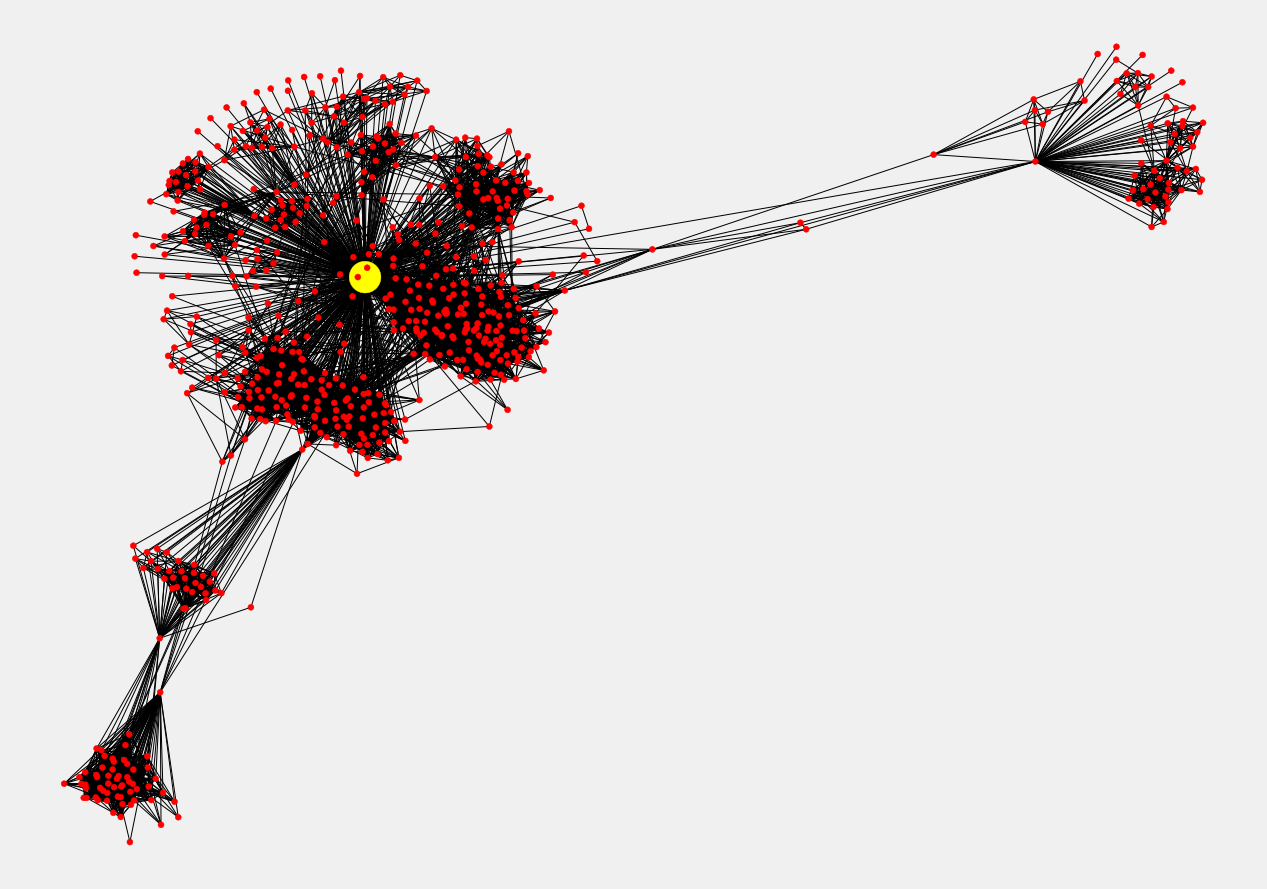

In [14]:
first_degree_connected_nodes = list(fb.neighbors(3437))
second_degree_connected_nodes = []
for x in first_degree_connected_nodes:
    second_degree_connected_nodes+=list(fb.neighbors(x))
second_degree_connected_nodes.remove(3437)
second_degree_connected_nodes = list(set(second_degree_connected_nodes))
subgraph_3437 = nx.subgraph(fb,first_degree_connected_nodes+second_degree_connected_nodes)
pos = nx.spring_layout(subgraph_3437)
node_color = ['yellow' if v == 3437 else 'red' for v in subgraph_3437]
node_size =  [1000 if v == 3437 else 35 for v in subgraph_3437]
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')
nx.draw_networkx(subgraph_3437, pos, with_labels = False, node_color=node_color,node_size=node_size )
plt.show()

## Centrality 

(-1.0767011433839797,
 0.6107240110635758,
 -0.8181965857744217,
 0.864286532998085)

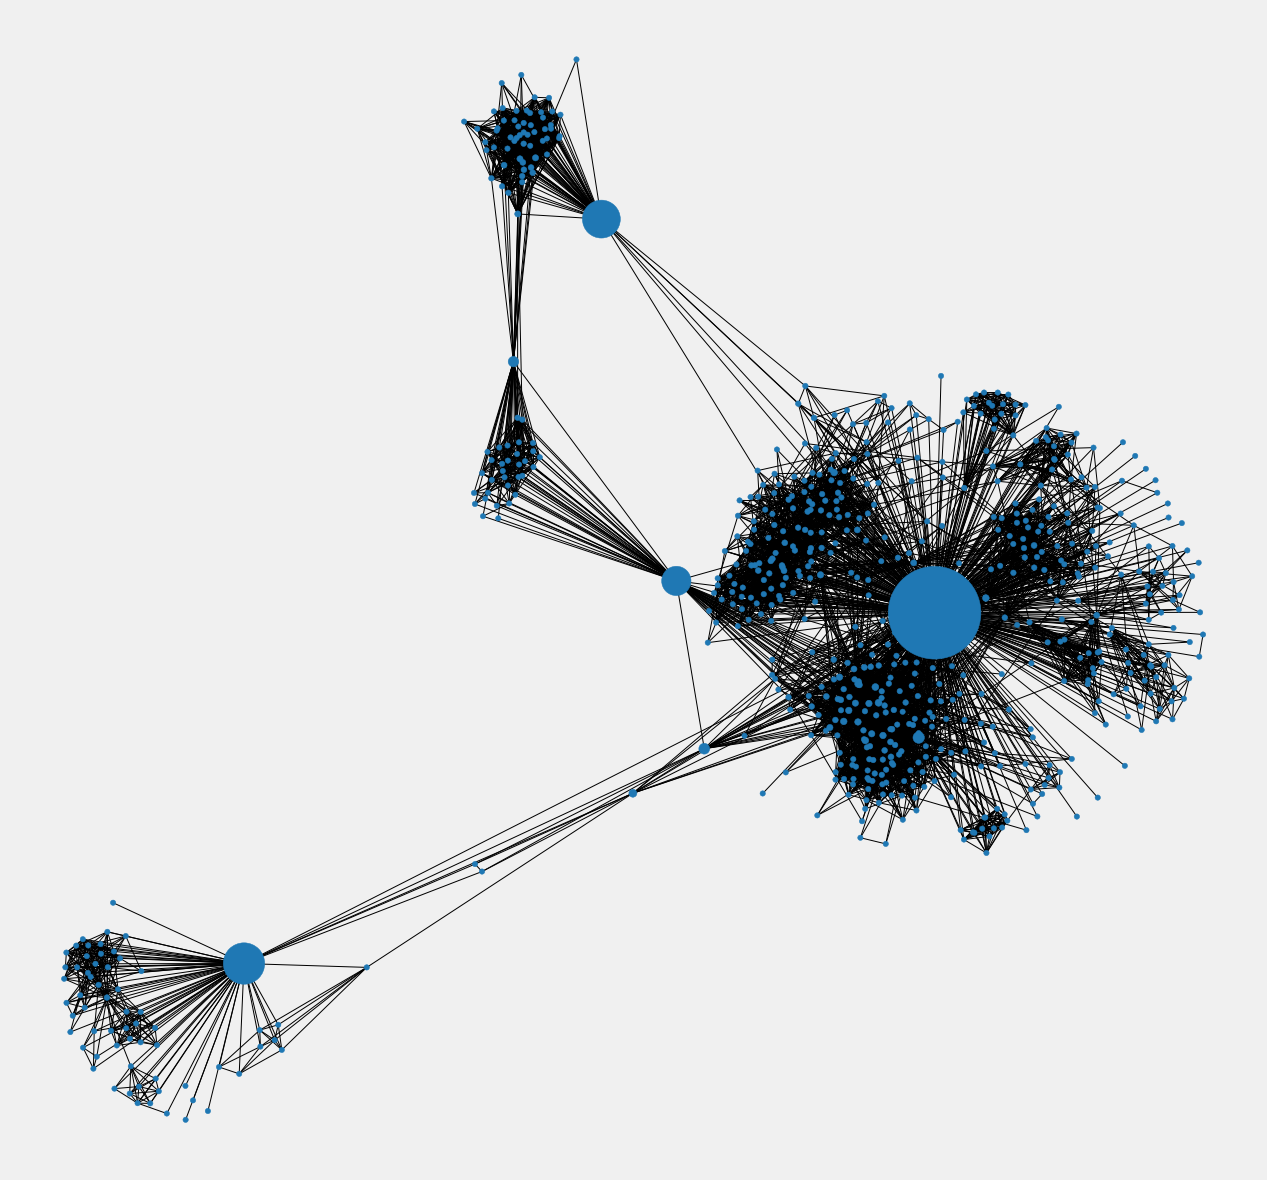

In [15]:
pos = nx.spring_layout(subgraph_3437)
betweennessCentrality = nx.betweenness_centrality(subgraph_3437,normalized=True, endpoints=True)
node_size =  [v * 10000 for v in betweennessCentrality.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(subgraph_3437, pos=pos, with_labels=False,
                 node_size=node_size )
plt.axis('off')